<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quick-look-at-the-data-structure" data-toc-modified-id="Quick-look-at-the-data-structure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quick look at the data structure</a></span></li><li><span><a href="#Create-a-test-set" data-toc-modified-id="Create-a-test-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a test set</a></span></li></ul></div>

# Download the data

In [19]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
LOCAL_FOLDER_PATH = os.path.join("datasets","housing")

In [3]:
def fetch_data(download_url = DOWNLOAD_URL, local_folder_path = LOCAL_FOLDER_PATH, cfilename = 'datafile.tgz'):
    if not os.path.isdir(local_folder_path):
        print(local_folder_path)
        os.mkdir(local_folder_path)
    local_filename = os.path.join(local_folder_path, cfilename)
    urllib.request.urlretrieve(download_url, filename=local_filename)
    local_tgz = tarfile.open(local_filename)
    local_tgz.extractall(path=local_folder_path)
    local_tgz.close()    

In [4]:
#fetch_data(cfilename='housing.tgz')

In [5]:
df_housing = pd.read_csv('../datasets/housing/housing.csv')

## Quick look at the data structure

In [6]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df_housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


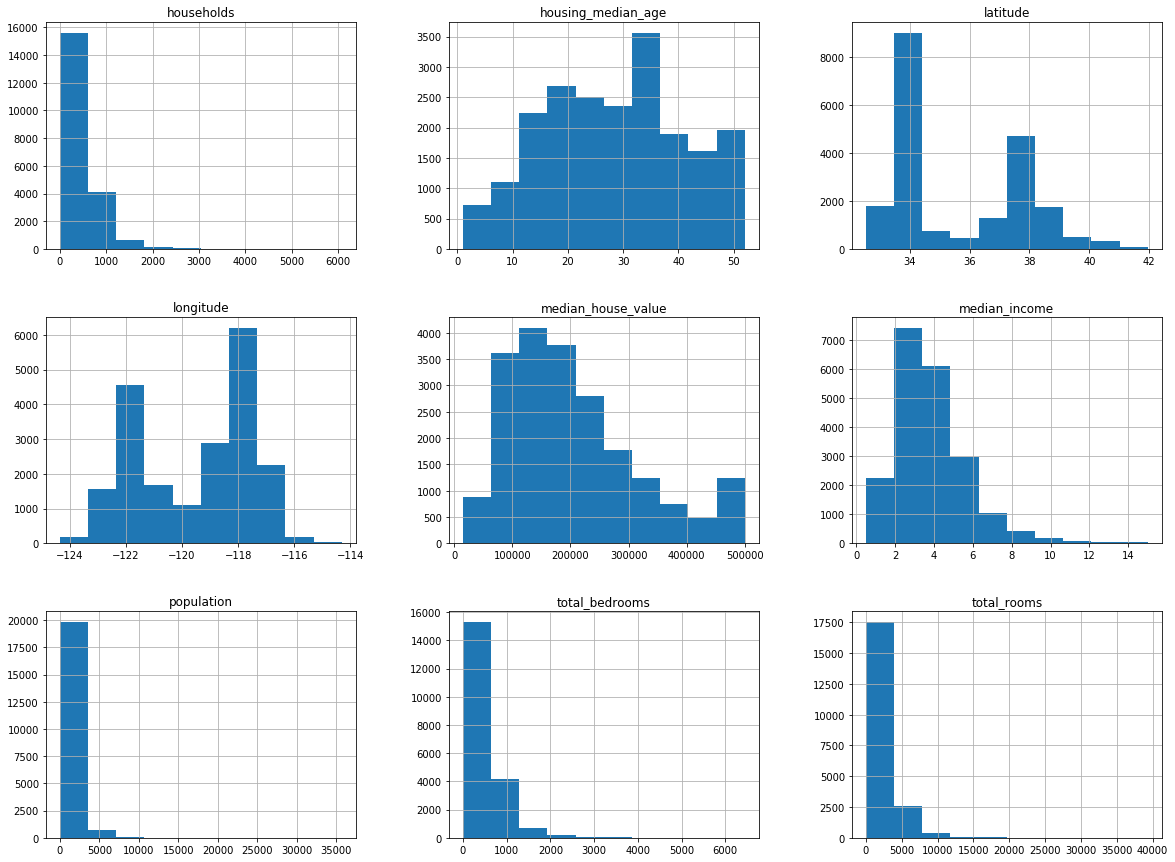

In [10]:
df_housing.hist(figsize=(20,15))
plt.show()

## Create a test set

In [11]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shufled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    print(ids)
    in_test_set = ids.apply(lambda id_ :test_set_check(id_, test_ratio, hash))
    print(in_test_set)
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [22]:
df_housing_with_id = df_housing.reset_index()

In [23]:
split_train_test_id(df_housing_with_id, 0.2, "index")

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
20610    20610
20611    20611
20612    20612
20613    20613
20614    20614
20615    20615
20616    20616
20617    20617
20618    20618
20619    20619
20620    20620
20621    20621
20622    20622
20623    20623
20624    20624
20625    20625
20626    20626
20627    20627
20628    20628
20629    20629
20630    20630
20631    20631
20632    20632
20633    20633
20634    20634
20635    20635
20636    20636
20637    20637
20638    20638
20639    20639
Name: index, Length: 20640, dtype: int64
0        False
1        False
2        False

(       index  longitude  latitude  housing_median_age  total_rooms  \
 0          0    -122.23     37.88                41.0        880.0   
 1          1    -122.22     37.86                21.0       7099.0   
 2          2    -122.24     37.85                52.0       1467.0   
 3          3    -122.25     37.85                52.0       1274.0   
 6          6    -122.25     37.84                52.0       2535.0   
 7          7    -122.25     37.84                52.0       3104.0   
 8          8    -122.26     37.84                42.0       2555.0   
 9          9    -122.25     37.84                52.0       3549.0   
 10        10    -122.26     37.85                52.0       2202.0   
 12        12    -122.26     37.85                52.0       2491.0   
 13        13    -122.26     37.84                52.0        696.0   
 14        14    -122.26     37.85                52.0       2643.0   
 15        15    -122.26     37.85                50.0       1120.0   
 16   